SID: 1838745

# Section A

### Data Curation

The data that was provided in a tsv format. I converted it to a csv format for processing purposes. The original data contained 
six fields: "Phenotype", "Sex_chromosomes", "rs139052738.", "rs886040801", "Expression.BMX" and "Expression.BRCA2". This 
data structure is demonstrated below.

In [368]:
original_data <- read.table(file = 'assignment_data.csv', sep = ',', header = TRUE)

In [369]:
head(original_data)

,Phenotype,Sex_chromosomes,rs139052738.,rs886040801,Expression.BMX,Expression.BRCA2
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>
1,unaffected,XX,C/T,T/T,317,497.0
2,unaffected,XY,T,T/G,333,252.0
3,unaffected,XX,C/T,G/T,300,274.5
4,unaffected,XY,T,G/T,334,283.0
5,unaffected,XX,C/C,T/T,379,412.0
6,unaffected,XX,C/T,G/T,391,237.0


There are multiple problems with data in this format. Firstly homozygous and heterozygous, for each gene, are represented as two alleles with a forward slash inbetween. I corrected for this by separating the alleles, for each gene, into two separate fields so that this data was not lost. This mean the removal of two fields but the addition of four fields. However, this does not show the nature of the genotype (heterozygous or homozygous) so I added an additional field per gene that stated this nature. Finally, I added a 3 fields for neural network purposes. One of these fields is a binary representation of the phenotype, while the other two are each a numerical scoring of the genotype nature (one field for each gene). This was a total addition of nine fields and the removal of two, which will increase initial overhead but be benefificial for calculations later on. This data structure can be seen below.

In [3]:
assignment_data <- read.table(file = 'altered_assignment_data.csv', sep = ',', header = TRUE)

In [5]:
head(assignment_data[1:7])
head(assignment_data[8:13])

,Phenotype,Sex_chromosomes,type_rs139052738,type_rs886040801,Expression.BMX,Expression.BRCA2,allele1_rs139052738
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,unaffected,XX,Heterozygous,Homozygous_T,317,497.0,C
2,unaffected,XY,Homozygous_T,Heterozygous,333,252.0,T
3,unaffected,XX,Heterozygous,Heterozygous,300,274.5,C
4,unaffected,XY,Homozygous_T,Heterozygous,334,283.0,T
5,unaffected,XX,Homozygous_C,Homozygous_T,379,412.0,C
6,unaffected,XX,Heterozygous,Heterozygous,391,237.0,C


,allele2_rs139052738,allele1_rs886040801,allel2_rs886040801,Binary_phenotype,Score_type_rs139052738,Score_type_rs886040801
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,T,T,T,0,2,0
2,,T,G,0,0,2
3,T,G,T,0,2,2
4,,G,T,0,0,2
5,C,T,T,0,1,0
6,T,G,T,0,2,2


The data structure is now more optimal however the classes for multiple fields are not very useful. The character field means the data is represented as a string and this will not be useful for visualisation. Some of these fields need to be converted to the factor data class which will represent the data has alternative options, much more viable for plotting and analysis. There is also some numeric fields and some integer fields, these do not all need to be synchonised as they are the difference of having decimals or not. However, I like having all the fields the same and so made them all the numeric data class. The four fields representing alleles are left as the character class as these fields are only maintained so that data is not lost, they are not used later on.

In [8]:
class(assignment_data$Phenotype)

[1] "character"

In [4]:
assignment_data$Phenotype <- as.factor(assignment_data$Phenotype)
assignment_data$Sex_chromosomes <- as.factor(assignment_data$Sex_chromosomes)
assignment_data$type_rs139052738 <- as.factor(assignment_data$type_rs139052738)
assignment_data$type_rs886040801 <- as.factor(assignment_data$type_rs886040801)
assignment_data$Expression.BMX <- as.numeric(assignment_data$Expression.BMX)
assignment_data$Binary_phenotype <- as.numeric(assignment_data$Binary_phenotype)
assignment_data$Score_type_rs139052738 <- as.numeric(assignment_data$Score_type_rs139052738)
assignment_data$Score_type_rs886040801 <- as.numeric(assignment_data$Score_type_rs886040801)

In [10]:
class(assignment_data$Phenotype)

[1] "factor"

In [6]:
head(assignment_data[1:7])
head(assignment_data[8:13])

,Phenotype,Sex_chromosomes,type_rs139052738,type_rs886040801,Expression.BMX,Expression.BRCA2,allele1_rs139052738
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,unaffected,XX,Heterozygous,Homozygous_T,317,497.0,C
2,unaffected,XY,Homozygous_T,Heterozygous,333,252.0,T
3,unaffected,XX,Heterozygous,Heterozygous,300,274.5,C
4,unaffected,XY,Homozygous_T,Heterozygous,334,283.0,T
5,unaffected,XX,Homozygous_C,Homozygous_T,379,412.0,C
6,unaffected,XX,Heterozygous,Heterozygous,391,237.0,C


,allele2_rs139052738,allele1_rs886040801,allel2_rs886040801,Binary_phenotype,Score_type_rs139052738,Score_type_rs886040801
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,T,T,T,0,2,0
2,,T,G,0,0,2
3,T,G,T,0,2,2
4,,G,T,0,0,2
5,C,T,T,0,1,0
6,T,G,T,0,2,2


### Data exploration

The data is now explored to check certain information within the data. This includes checking how many phenotypes there are and what they are, the different types of genotype as well as some exploration of each phenotypes dataset.

In [293]:
unique(assignment_data$Phenotype)
nrow(assignment_data)

[1] unaffected      familial cancer
Levels: familial cancer unaffected

[1] 148

In [294]:
unique(assignment_data$type_rs139052738)

[1] Heterozygous Homozygous_T Homozygous_C
Levels: Heterozygous Homozygous_C Homozygous_T

In [295]:
unique(assignment_data$type_rs886040801)

[1] Homozygous_T Heterozygous Homozygous_G
Levels: Heterozygous Homozygous_G Homozygous_T

The cancer data is isolated and copied into its own table. This data is then checked for information regarding how many occurrences of cancer there are in the data and the average expression of each gene within cancer patients. This exploration is important as it provides information regarding the prevalence of this cancer within the patient group which can then be extrapolated to the wider community. It is important when doing this sort of isolation that all the values that field can be assigned are known in order to make sure that all the relevant data is isolated and that none is missed. This exploration is the first insight into the data and so if there was an error at an early stage, then the hypothesis generated later could be inaccurate.

In [296]:
cancer <- assignment_data[ which(assignment_data$Phenotype=="familial cancer"),]
nrow(cancer)

[1] 33

In [297]:
min(cancer$Expression.BRCA2)
max(cancer$Expression.BRCA2)
mean(cancer$Expression.BRCA2)

[1] 21

[1] 276.5

[1] 72.86364

In [298]:
min(cancer$Expression.BMX)
max(cancer$Expression.BMX)
mean(cancer$Expression.BMX)

[1] 301

[1] 399

[1] 350.4242

The non-cancer data is isolated and copied into its own table. This data is then checked for information regarding how many unaffected patients there are in the data and the average expression of each gene within these patients.

In [299]:
unaffected <- assignment_data[ which(assignment_data$Phenotype=="unaffected"),]
nrow(unaffected)

[1] 115

In [300]:
min(unaffected$Expression.BRCA2)
max(unaffected$Expression.BRCA2)
mean(unaffected$Expression.BRCA2)

[1] 24

[1] 500

[1] 321.0913

In [301]:
min(unaffected$Expression.BMX)
max(unaffected$Expression.BMX)
mean(unaffected$Expression.BMX)

[1] 300

[1] 399

[1] 348.7391

This initial exploration indicates that there is a clear link between low BRCA2 expression and expression the phenotype of familial cancer, however this needs to be further tested. 

All the data fields need to be visualised against one another in order to see what sort of relationships occur between the data. The _pairs_ command enables this.

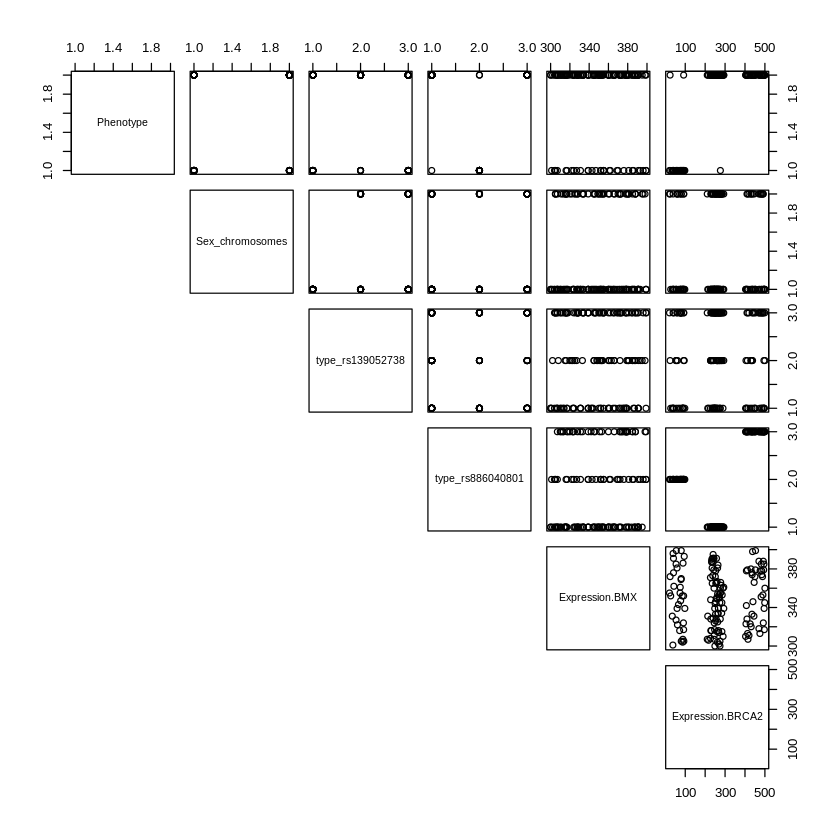

In [374]:
pairs(assignment_data[1:6], lower.panel = NULL)

None of the data seems to have a correlative relationship and all seems to be separated into discrete sections. The closest relationship to a correlation is between the expression levels of each gene, which can be seen in greater detail below. 

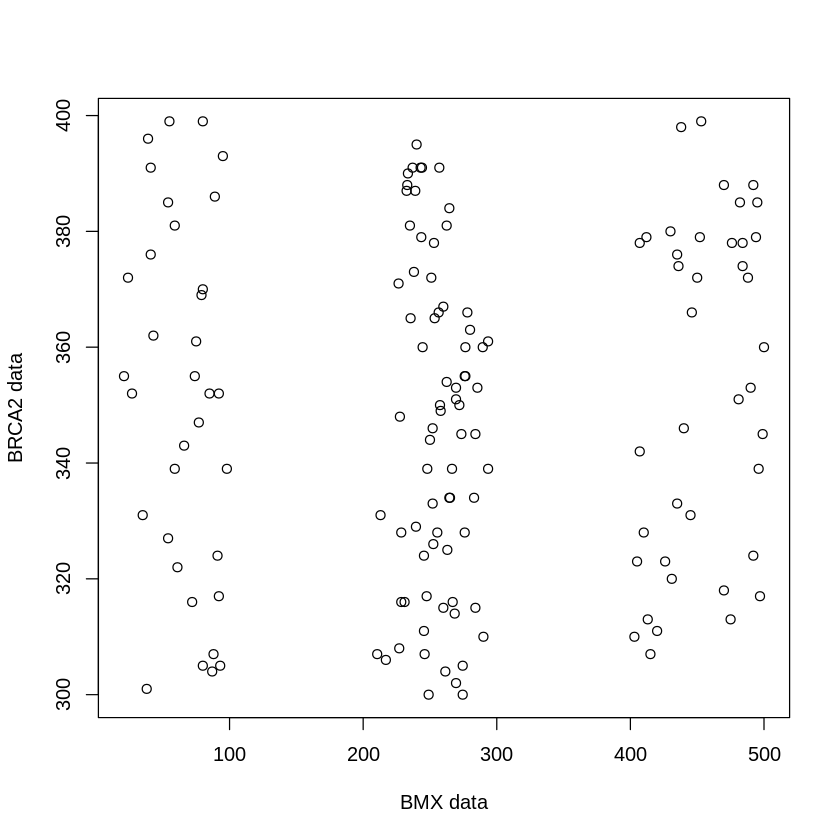

In [375]:
plot(y = assignment_data$Expression.BMX, x = assignment_data$Expression.BRCA2, xlab = "BMX data", ylab = "BRCA2 data")

This still does not look great for linear regression, however more importantly this relationship has very little about the cancer patients as it is not using the phenotype as a variable. For this reason, linear regression will not be completed.

Before the analysis is done, the data needs to be split into training and testing data. The training data will be used to train the models while the test data will be used to test their accuracy. The training data needs to be larger than the testing data to ensure the model is trained correctly, and so 80% of the data will be used for training and 20% used for testing. Ensuring the seed is set to the same values means the testing and training data will always be split the same.

In [5]:
set.seed(123)

split_size = 0.8

sample_size = floor(split_size * nrow(assignment_data))

train_indices <- sample(seq_len(nrow(assignment_data)), size = sample_size)

train <- assignment_data[train_indices, ]
test <- assignment_data[-train_indices, ]

Quick exploration of the training and testing data shows that it is roughly correct in dimensions

In [9]:
head(train[1:7])
head(train[8:13])
nrow(train)

,Phenotype,Sex_chromosomes,type_rs139052738,type_rs886040801,Expression.BMX,Expression.BRCA2,allele1_rs139052738
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
14,unaffected,XX,Heterozygous,Homozygous_T,376,435.0,T
50,unaffected,XY,Homozygous_C,Heterozygous,345,284.0,C
118,familial cancer,XX,Homozygous_C,Homozygous_G,393,95.0,C
43,unaffected,XX,Homozygous_T,Heterozygous,304,261.5,T
148,unaffected,XY,Homozygous_T,Heterozygous,334,265.0,T
146,unaffected,XX,Heterozygous,Homozygous_T,313,475.0,C


,allele2_rs139052738,allele1_rs886040801,allel2_rs886040801,Binary_phenotype,Score_type_rs139052738,Score_type_rs886040801
,<chr>,<chr>,<chr>,<int>,<int>,<int>
14,C,T,T,0,2,0
50,,T,G,0,1,2
118,C,G,G,1,1,1
43,T,G,T,0,0,2
148,,G,T,0,0,2
146,T,T,T,0,2,0


[1] 118

The data selected fro each data set is random in order to make sure that there is no bias in the models generated from the training data. The test data wants to be small as the testing should not take a long time but instead give an quick about which can be sanity checked to be correct and look like the expected output of the testing.

In [10]:
head(test[1:7])
head(test[8:13])
nrow(test)

,Phenotype,Sex_chromosomes,type_rs139052738,type_rs886040801,Expression.BMX,Expression.BRCA2,allele1_rs139052738
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>
1,unaffected,XX,Heterozygous,Homozygous_T,317,497.0,C
2,unaffected,XY,Homozygous_T,Heterozygous,333,252.0,T
3,unaffected,XX,Heterozygous,Heterozygous,300,274.5,C
5,unaffected,XX,Homozygous_C,Homozygous_T,379,412.0,C
11,unaffected,XX,Homozygous_C,Heterozygous,363,280.0,C
18,familial cancer,XX,Heterozygous,Homozygous_G,331,35.0,C


,allele2_rs139052738,allele1_rs886040801,allel2_rs886040801,Binary_phenotype,Score_type_rs139052738,Score_type_rs886040801
,<chr>,<chr>,<chr>,<int>,<int>,<int>
1,T,T,T,0,2,0
2,,T,G,0,0,2
3,T,G,T,0,2,2
5,C,T,T,0,1,0
11,C,T,G,0,1,2
18,T,G,G,1,2,1


[1] 30

### Logistic Regression

Visualising phenotype vs BRCA2 expression and phenotype vs BMX expression confirms the earlier hypothesis that BRCA2 expression is linked to familial cancer rather than BMX expression. This can be seen by the fact that the BMX expression data for both familial cancer and unaffected patients is continuous along the x-axis while the BRCA2 expression is categorical.

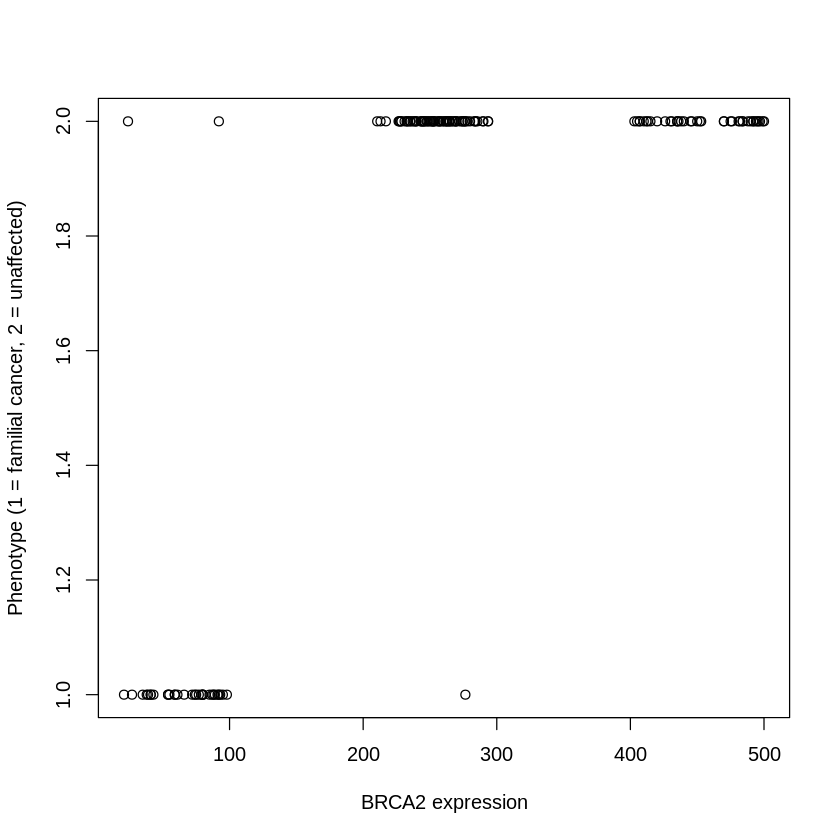

In [316]:
plot(y = assignment_data$Phenotype, x = assignment_data$Expression.BRCA2, xlab = "BRCA2 expression",
    ylab = "Phenotype (1 = familial cancer, 2 = unaffected)")

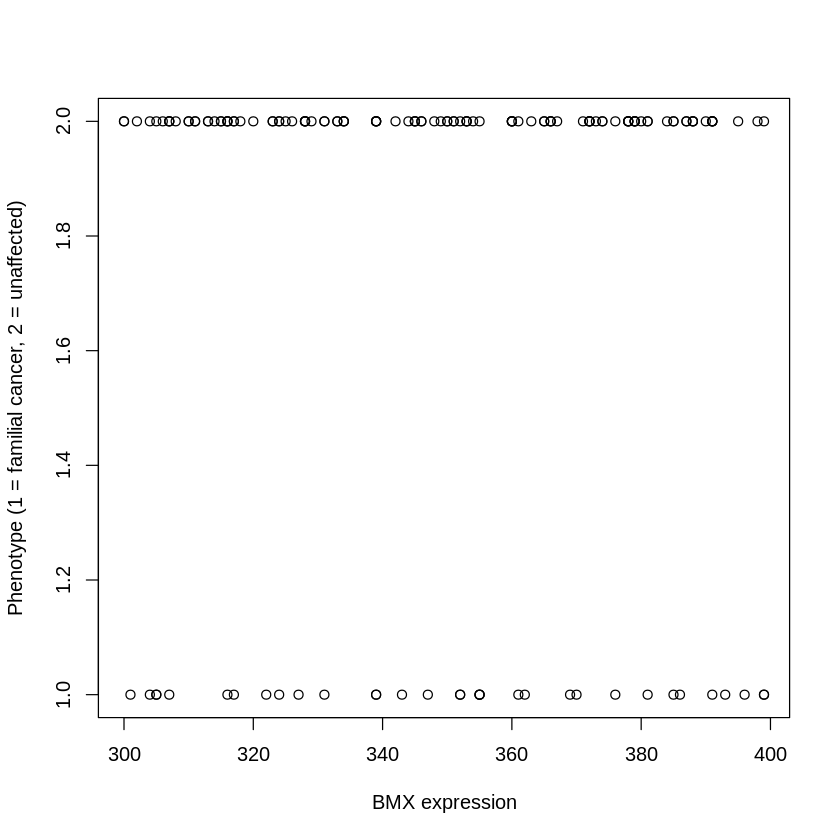

In [317]:
plot(y = assignment_data$Phenotype, x = assignment_data$Expression.BMX, xlab = "BMX expression", ylab = "Phenotype (1 = familial cancer, 2 = unaffected)")

To further identify the cause of the cancer, phenotype vs BRCA2 genotype type is plotted. This shows that the vast majority of cancer patients are Homozygous_G while none are Homozygous_T and a minimal amount are Heterozygous. Further more only a very small percentage of unaffected patients are Homozygous_G.

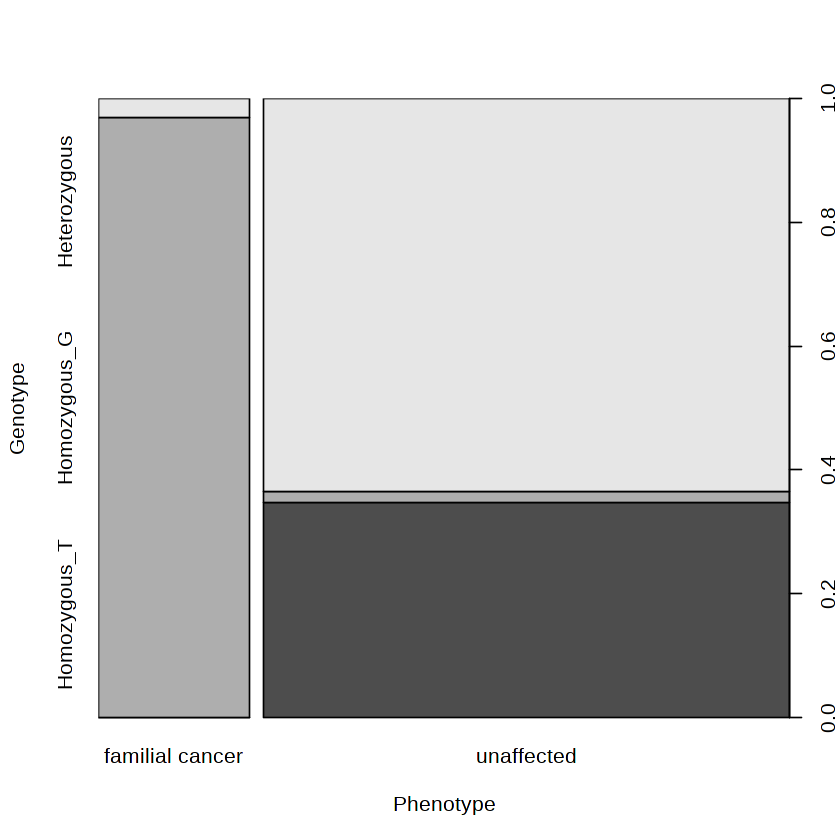

In [22]:
plot(y = assignment_data$type_rs886040801, x = assignment_data$Phenotype, xlab = "Phenotype", ylab = "Genotype")

Plotting phenotype vs BMX genotype type shows that there is no link between the genotype of BMX and cancer. This can be seen as there is a fairly even split of Homozygous_T, Homozygous_C and Heterozygous across the two phenotypes.

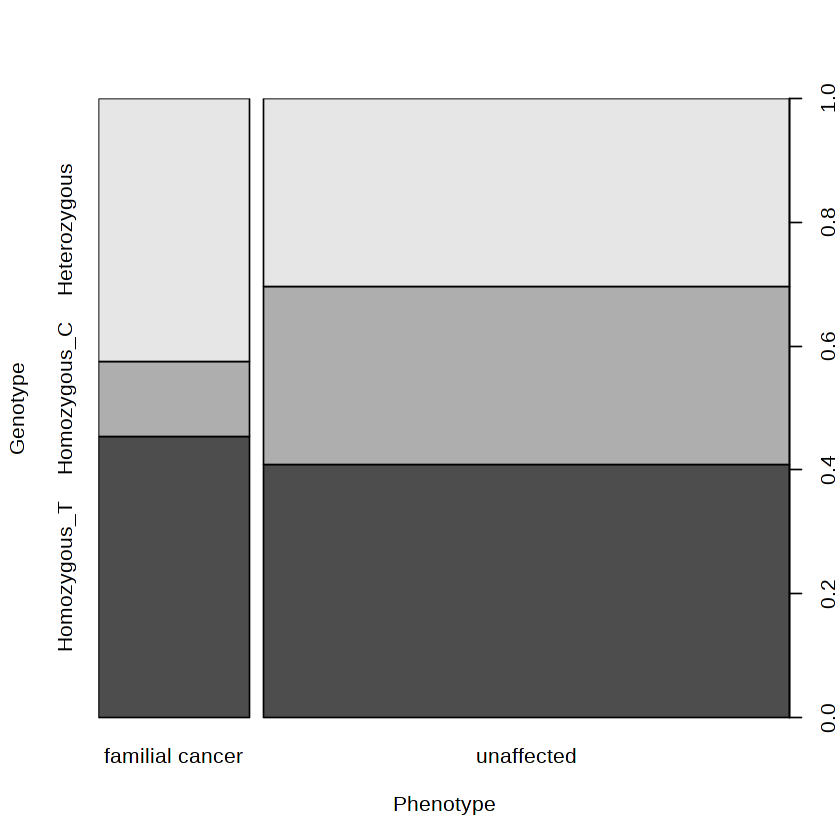

In [21]:
plot(y = assignment_data$type_rs139052738, x = assignment_data$Phenotype, xlab = "Phenotype", ylab = "Genotype")

To perform logistic regression the _caTools_ package is needed. Once this is loaded, the labels for the data need to be isolated as does the data to be regressed. Earlier visualisation suggested that the expression levels of the BRCA2 gene could be used to identify the cancer patients, however to confirm this both sets of expression data will be used from the training dataset. The labels used will be the phenotype themselves.

In [6]:
library(caTools)
Label.train = train[, 1]
Data.train = train[, 5:6]
model = LogitBoost(Data.train, Label.train)
Data.test = test[5:6]
Lab = predict(model, Data.test, type = "raw")
head(data.frame(test$Phenotype, test$Expression.BMX, test$Expression.BRCA2, Lab), n = 8)

,test.Phenotype,test.Expression.BMX,test.Expression.BRCA2,familial.cancer,unaffected
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,unaffected,317,497.0,0.1192029,0.8807971
2,unaffected,333,252.0,0.1192029,0.8807971
3,unaffected,300,274.5,0.1192029,0.8807971
4,unaffected,379,412.0,0.1192029,0.8807971
5,unaffected,363,280.0,0.1192029,0.8807971
6,familial cancer,331,35.0,0.5000000,0.5000000
7,unaffected,302,269.5,0.1192029,0.8807971
8,unaffected,334,264.5,0.1192029,0.8807971


The results of the logistic regression clearly show that the patients with much lower BRCA2 expression levels have a much higher chance of having cancer. This score is still only 0.5, which will be due to the lack of relationship between phenotype and BMX expression, however this is significantly higher that the 0.12 score of the patients with a high BRCA2 gene expression lever.

K-means clustering will not be done as analysis as the data is categorical already and this would not provide much information. The only data relationship clustering could work on is the Expression of BRCA2 vs Expression of BMX but, as stated earlier, this will not be of much use to cancer identification.

### Tree based models

In machine learning, conditional inference trees can help identify what data has the biggest weight in determining another data field. Each nnode represents either a decision based on the data (such as data field X with a value greater than Y will have a different affect on data than a value less than Y) or represents a data distribution of the data type being investigated.

In this tree, the Phenotype data is compared to the karyotype, genotype types of BMX and BRCA2 and the expression levels of BMX and BRCA2. The tree is then plotted and it shows that the only factor that seems to determine phenotype is the genotype type of BRCA2 gene, where Homozgyous_G links to familial cancer. This supports what the earlier visualisation and logistic regression suggested. Crucially however, there is still some non cancer patients on node 2 and some cancer patients on node 3, they are just minimal, which shows a high likelihood of a causative relationship between BRCA2 Homozygous_G and cancer but not an 100% relationship.

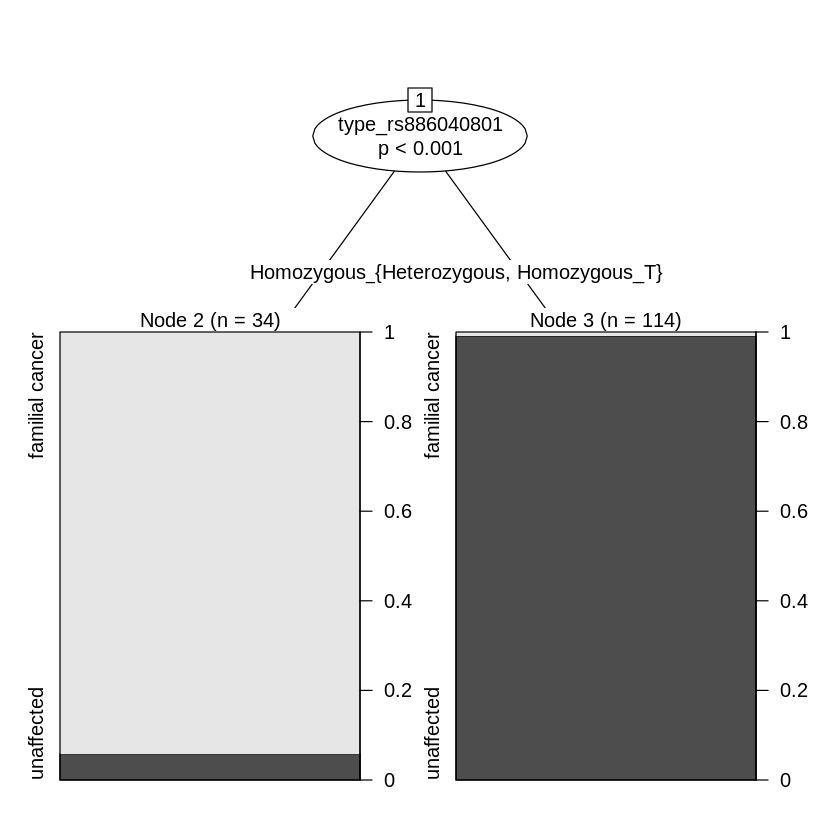

In [329]:
library(party)
tree_data = assignment_data[1:6]
tree <- ctree(Phenotype ~ ., data = tree_data)
plot(tree)

The only issue with this plot is that it used the entire dataset to train the data. Instead the training data should be used and then the testing data can check whether the tree works or not. The same logic as before is used to design a new tree, however this time training data is the input.

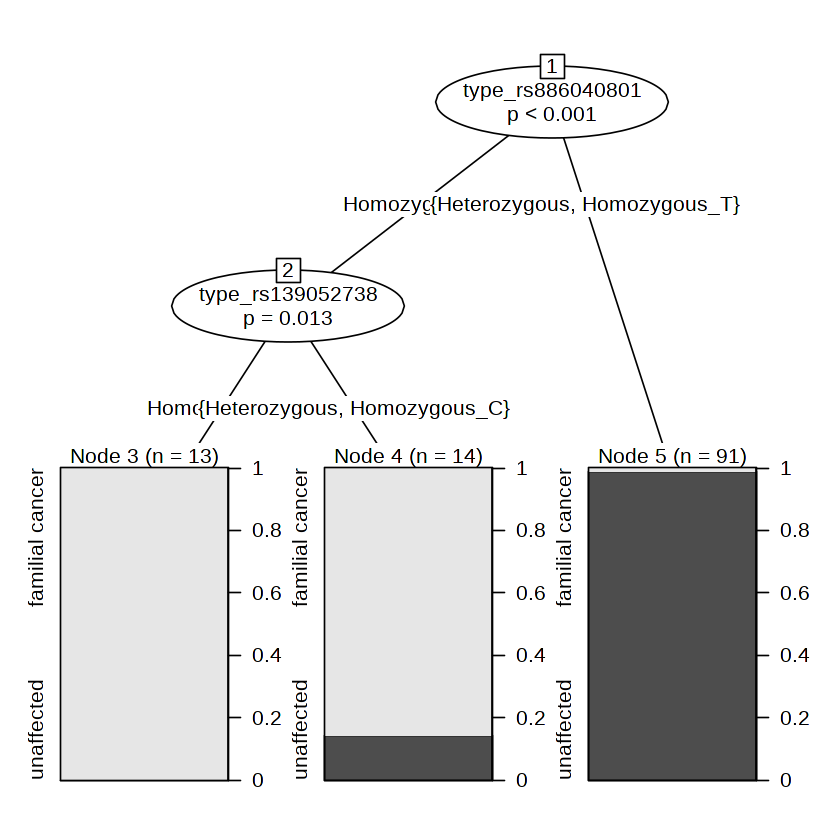

In [15]:
tree2 <- ctree(Phenotype ~ ., data = train[1:6])
plot(tree2)

Interestingly this produced a different tree. This is due to a smaller dataset meaning that there is actually less weight to each data field. However, this tree also shows the same logic that the genotype type of BRCA2 gene is the biggest determinant in whether a patient has cancer or not. There is also a second weighting, genotype type of BMX gene. This shows that although it is not a major factor, some amount of cancer patients who do not have Homozygous_G for BRCA2 also do not have Homozygous_T for BMX. 

Next the remaining data is tested on the tree to see what is identified. The same data is used to help determine the phenotype: karyotype, genotype types and gene expression of both genes. The results of this are then outputted to a dataframe for sanity checking.

In [18]:
test$phenotype.tree <- predict(tree2, test[2:6])
test$class <- predict(tree2, test[2:6], type = "node")
tree_output <- data.frame(test$phenotype.tree, test$class, test$type_rs139052738, test$Expression.BMX, test$type_rs886040801, test$Expression.BRCA2)

In [23]:
head(tree_output, n = 8)

,test.phenotype.tree,test.class,test.type_rs139052738,test.Expression.BMX,test.type_rs886040801,test.Expression.BRCA2
,<fct>,<int>,<fct>,<dbl>,<fct>,<dbl>
1,unaffected,5,Heterozygous,317,Homozygous_T,497.0
2,unaffected,5,Homozygous_T,333,Heterozygous,252.0
3,unaffected,5,Heterozygous,300,Heterozygous,274.5
4,unaffected,5,Homozygous_C,379,Homozygous_T,412.0
5,unaffected,5,Homozygous_C,363,Heterozygous,280.0
6,familial cancer,4,Heterozygous,331,Homozygous_G,35.0
7,unaffected,5,Homozygous_C,302,Heterozygous,269.5
8,unaffected,5,Homozygous_T,334,Heterozygous,264.5


The groupings seem to be correct with low BRCA2 expression and Homozgyous_G genotype being identified as cancerous, however to check all of the cancer data predictions, collection is needed.

In [393]:
cancerous_cells <- tree_output[ which(tree_output$test.phenotype.tree=="familial cancer"),]
cancerous_cells

,test.phenotype.tree,test.class,test.type_rs139052738,test.Expression.BMX,test.type_rs886040801,test.Expression.BRCA2
,<fct>,<int>,<fct>,<dbl>,<fct>,<dbl>
6,familial cancer,4,Heterozygous,331,Homozygous_G,35
10,familial cancer,4,Heterozygous,376,Homozygous_G,41
14,familial cancer,4,Heterozygous,386,Homozygous_G,89
16,familial cancer,4,Homozygous_C,327,Homozygous_G,54
17,familial cancer,4,Homozygous_C,385,Homozygous_G,54
18,familial cancer,4,Heterozygous,391,Homozygous_G,41
19,familial cancer,3,Homozygous_T,317,Homozygous_G,92


Looking at this data, it is clear that all the cancer patients in the testing dataset have Homozgyous_G genotype and low BRCA2 expression, which supports the hypothesis.

### Neural Networks

Neural networks will take a set of input values, perform processes to them and provide an output to the user. This is a bit more of a black box approach however they are beneficial when the methodology is not known. Neural networks do need a bit of their own preprocessing however as they take numerical inputs. So the neural network below uses numerical representations of pehnotype and genotype type of both BMX and BRCA2.

In [394]:
net_data <- assignment_data[11:13]
head(net_data)

,Binary_phenotype,Score_type_rs139052738,Score_type_rs886040801
,<dbl>,<dbl>,<dbl>
1,0,2,0
2,0,0,2
3,0,2,2
4,0,0,2
5,0,1,0
6,0,2,2


The seed is again set to ensure that the same neural network can be used later. The neural network takes the binary phenotype data and makes it a function of the genotype type numerical data of both genes. The number of hidden layers is set to one as a measure of performance.

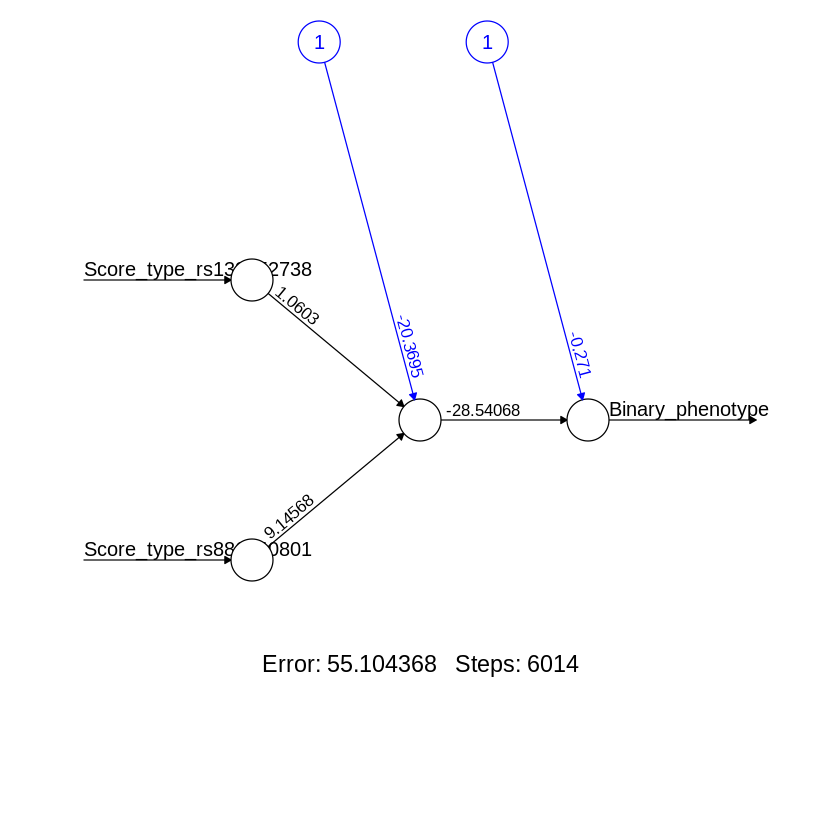

In [339]:
set.seed(123)

net1 <- neuralnet(Binary_phenotype ~ Score_type_rs139052738 + Score_type_rs886040801, net_data, hidden = 1,
    err.fct = "ce", linear.output = FALSE)

plot(net1, rep = "best")

The neural network output also supports the same hypothesis, showing that there is more weight towards the genotype type of BRCA2 in the determination of the phenotype than there is weight towards BMX genotype type. The most concerning result here is that the error rate is very high and the number of steps is large, this however can be altered by increasing number of hidden layers.

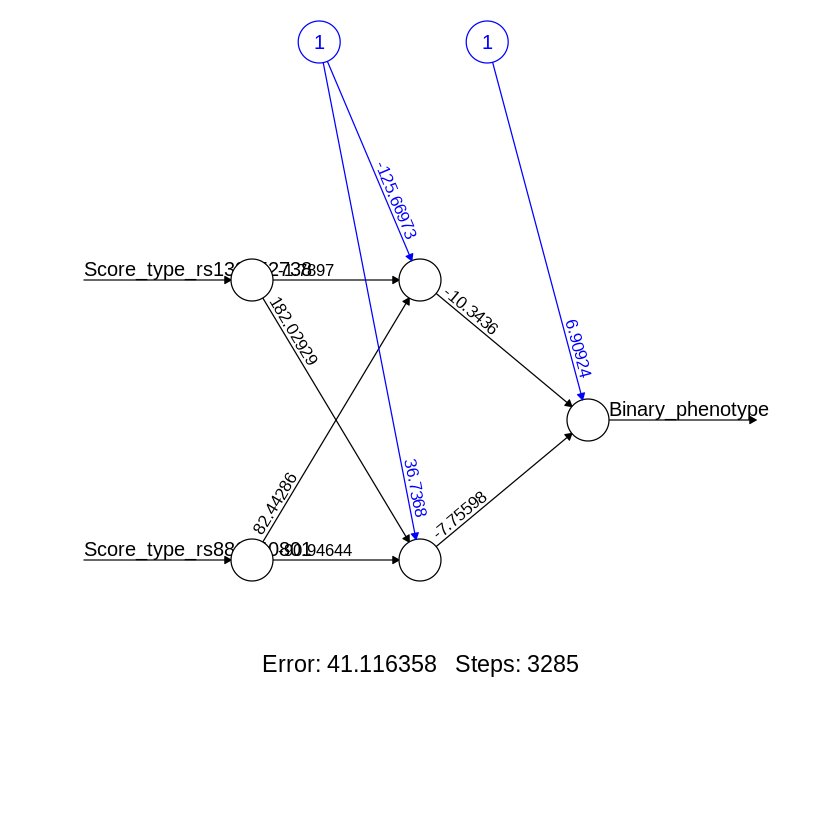

In [341]:
set.seed(123)

net2 <- neuralnet(Binary_phenotype ~ Score_type_rs139052738 + Score_type_rs886040801, net_data, hidden = 2,
    err.fct = "ce", linear.output = FALSE)

plot(net2, rep = "best")

Doubling the number of hidden layers halves the number of steps, which makes sense, and reduces the error rate by 14. However this is still a large error rate and number of steps so the hidden layers need to be increased again.

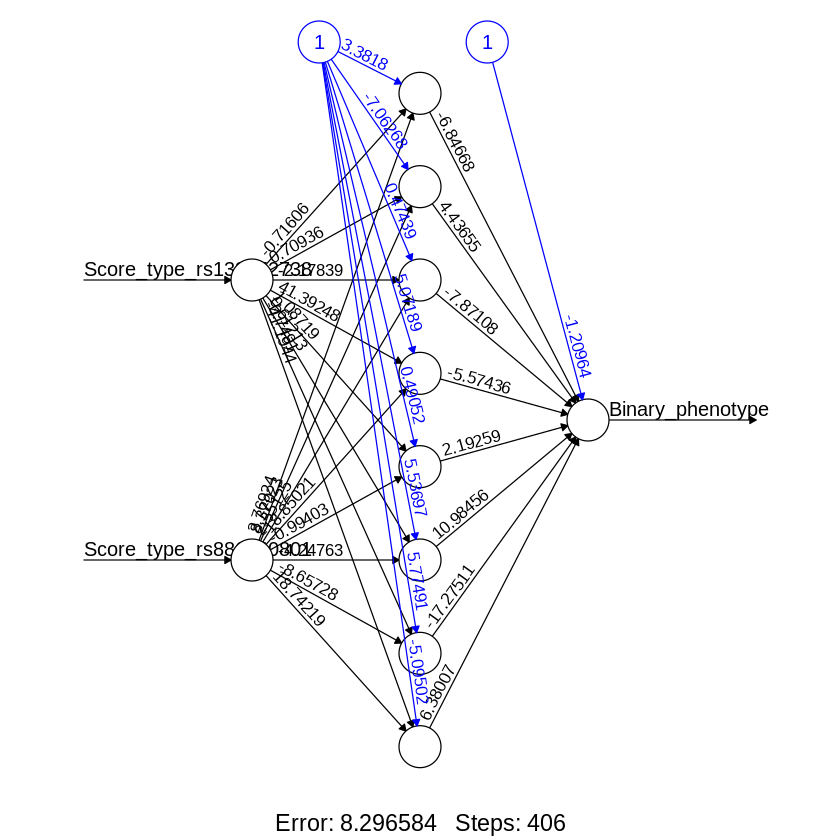

In [342]:
set.seed(123)

net8 <- neuralnet(Binary_phenotype ~ Score_type_rs139052738 + Score_type_rs886040801, net_data, hidden = 8,
    err.fct = "ce", linear.output = FALSE)

plot(net8, rep = "best")

With eight hidden layers the error rate has dropped massively down to 8 and steps reduced to 400. This is still too high however. The problem now is that going to a larger number of hidden layers crosses into the realm of over-fitting. 

### Predicting new data

The machine learning method used to predict the genotypes of the new data will be the tree-based model. This is due to the error rate in neural networks being too high as well as potential overfitting of the data. Logistic regression will also not be used despite giving good results and the tree-based model provided more information and in a more accurate manner, logistic regression only had a score of 0.5 for familial cancer patients.

In [7]:
predict_data <- read.table(file = 'altered_predict_data.csv', sep = ',', header = TRUE)

The same preprocessing of data structure and data class is done to the prediction data as with the testing data. This will ensure that the new data can be used by the model and for reproducibility purposes. The only change to the data structure of note is that the "Phenotype" field is missing as this is what will be predicted by the model. This also means the "Binary_phenotype" field will be missing.

In [28]:
dim(assignment_data)
dim(predict_data)

[1] 148  13

[1]  8 11

In [13]:
predict_data[1:6]
predict_data[7:11]

Sex_chromosomes,type_rs139052738,type_rs886040801,Expression.BMX,Expression.BRCA2,allele1_rs139052738
<chr>,<chr>,<chr>,<int>,<int>,<chr>
XX,Homozygous_C,Heterozygous,327,264,C
XX,Homozygous_T,Heterozygous,345,192,T
XX,Heterozygous,Homozygous_G,365,23,T
XX,Homozygous_T,Homozygous_T,376,435,T
XX,Heterozygous,Heterozygous,335,270,C
XY,Homozygous_T,Heterozygous,372,251,T
XX,Heterozygous,Homozygous_G,324,42,T
XX,Heterozygous,Homozygous_G,331,35,C


allele2_rs139052738,allele1_rs886040801,allel2_rs886040801,Score_type_rs139052738,Score_type_rs886040801
<chr>,<chr>,<chr>,<int>,<int>
C,G,T,1,2
T,T,G,0,2
C,G,G,2,1
T,T,T,0,0
T,G,T,2,2
,T,G,0,2
C,G,G,2,1
T,G,G,2,1


In [8]:
class(predict_data$Sex_chromosomes)

[1] "character"

In [9]:
predict_data$Sex_chromosomes <- as.factor(predict_data$Sex_chromosomes)
predict_data$type_rs139052738 <- as.factor(predict_data$type_rs139052738)
predict_data$type_rs886040801 <- as.factor(predict_data$type_rs886040801)
predict_data$Expression.BMX <- as.numeric(predict_data$Expression.BMX)
predict_data$Expression.BRCA2 <- as.numeric(predict_data$Expression.BRCA2)
predict_data$Score_type_rs139052738 <- as.numeric(predict_data$Score_type_rs139052738)
predict_data$Score_type_rs886040801 <- as.numeric(predict_data$Score_type_rs886040801)

In [10]:
class(predict_data$Sex_chromosomes)

[1] "factor"

Now that the data structure for the prediction data is correct as well as the the data classes, sanity check that the all the classes are correct before implementing the model on the new data.

In [14]:
predict_data[1:6]
predict_data[7:11]

Sex_chromosomes,type_rs139052738,type_rs886040801,Expression.BMX,Expression.BRCA2,allele1_rs139052738
<chr>,<chr>,<chr>,<int>,<int>,<chr>
XX,Homozygous_C,Heterozygous,327,264,C
XX,Homozygous_T,Heterozygous,345,192,T
XX,Heterozygous,Homozygous_G,365,23,T
XX,Homozygous_T,Homozygous_T,376,435,T
XX,Heterozygous,Heterozygous,335,270,C
XY,Homozygous_T,Heterozygous,372,251,T
XX,Heterozygous,Homozygous_G,324,42,T
XX,Heterozygous,Homozygous_G,331,35,C


allele2_rs139052738,allele1_rs886040801,allel2_rs886040801,Score_type_rs139052738,Score_type_rs886040801
<chr>,<chr>,<chr>,<int>,<int>
C,G,T,1,2
T,T,G,0,2
C,G,G,2,1
T,T,T,0,0
T,G,T,2,2
,T,G,0,2
C,G,G,2,1
T,G,G,2,1


The same tree that was trained and tested earlier is used. The data fields used are the same as before however their index is different as there is no phenotype column in this dataset. The results are then outputted to see if the predictions seem viable.

In [16]:
predict_data$predict.phenotype.tree <- predict(tree2, predict_data[1:5])
predict_data$predict.class <- predict(tree2, predict_data[1:5], type = "node")
predict_output <- data.frame(predict_data$predict.phenotype.tree, predict_data$predict.class, predict_data$type_rs139052738, predict_data$Expression.BMX, predict_data$type_rs886040801, predict_data$Expression.BRCA2)

In [17]:
predict_output[1:4]
predict_output[5:6]

predict_data.predict.phenotype.tree,predict_data.predict.class,predict_data.type_rs139052738,predict_data.Expression.BMX
<fct>,<int>,<fct>,<dbl>
unaffected,5,Homozygous_C,327
unaffected,5,Homozygous_T,345
familial cancer,4,Heterozygous,365
unaffected,5,Homozygous_T,376
unaffected,5,Heterozygous,335
unaffected,5,Homozygous_T,372
familial cancer,4,Heterozygous,324
familial cancer,4,Heterozygous,331


predict_data.type_rs886040801,predict_data.Expression.BRCA2
<fct>,<dbl>
Heterozygous,264
Heterozygous,192
Homozygous_G,23
Homozygous_T,435
Heterozygous,270
Heterozygous,251
Homozygous_G,42
Homozygous_G,35


Three patients have cancer and they are the three with Homozygous_G for the BRCA2 gene which leads to a low expression level of BRCA2. This is the same as what the analysis earlier had suggested, so the model seems to work. Importantly the nodes which are assigned to the different phenotypes also match the nodes used in the testing of the tree, which shows that the model worked in the same manner on the prediction data.

# Section B

The sections of a DNA resequencing pipeline that can be improved with machine learning are the non-deterministic sections because a deterministic step can be optimised but with the method already known there is no benefit to using machine learning. The two that have already had success are quality control and variant calling. The problem in variant calling is what exactly is a variant? This question does not have an answer and previously used lists of known variants. DeepVariant is a variant caller that uses deep learning to identify the variants. With DeepVariant, variants are identified by sampling the input data for examples. These examples are then used to reanalyse the entire dataset and identify the variants. This software uses tensor format to achieve this and data is outputted in standard vcf format. Deep variant had the best benchmarking results in a 2020 comparison as well as being faster, due to parallelisation. DeepVariant is also trained on a variety of datasets of different species and sequencing techniques before using input data on top to ensure the results are not just accurate and fast, but also flexible depending on inputs used. The second area is quality control, the software seqQscorer uses the quality control statistics or features and analyses them. SeqQscorer determines the quality level of the data using the provided statistics. SeqQscorer uses supervised machine learning to calculate quality statistics from BAM or FastQ files. Information such as experimental type and the aforementioned quality statistics and inputs them into a model. The model is trained on first use and is outputted into a subfolder, the model can then be ran using both raw and mapped reads. The output of FastQC, Bowtie2 and aligned BAM files are all used to provide the model with information on whether data is high quality or not. The difference between seqQscorer and DeepVariant is that seqQscorer is adding the already in place QC processes, while DeepVariant is replacing the current processes. Each software uses a different method however there are some overarching themes. All areas of resequencing that can be improved by machine learning are areas where a human has to determine something i.e. what is high quality, what is a read. These are improved by allowing a machine to be trained on a subset of the data before analysing the data for itself. This makes the results more accurate to that data and removes human error and discrepancies. They also improve the speed at which these analyses are done due to utilisation of various layers and parallelisation. Finally, the most advantageous part using machine learning is that with using a model trained the same way on different datasets will allow for better comparisons and reproducibility, while also improving the model with every iteration.